In [374]:
%pylab inline

import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import preprocess

matplotlib.pyplot.style.use = 'default'

Populating the interactive namespace from numpy and matplotlib


In [178]:
stat_data = {}

In [179]:
employment_info = pd.read_csv('data/500candidate_employment_info.csv', delimiter=',')
general_info = pd.read_csv('data/500candidate_general_info.csv', delimiter=',')
skill_info = pd.read_csv('data/500candidates_skill_info.csv', delimiter=',')
edu_info  = pd.read_csv('data/500candidate_education_info.csv', delimiter=',')
data = employment_info

In [180]:
# print '%s candidate have no gender in %s' % (len(data[pd.isnull(data.candidate_gender)]), len(data))

In [181]:
len(data)

2000

In [182]:
def clean_datetime(data):
    data.c_employment_job_start = data.c_employment_job_start.map(preprocess.clean_datetime)
    data.c_employment_job_end = data.c_employment_job_end.map(preprocess.clean_datetime)
    
    data = data[~pd.isnull(data['c_employment_job_start'])]
    
    return data

In [183]:
data = clean_datetime(data)

'str' object has no attribute 'date'


In [184]:
data = data.rename(columns = {'c_employment_employer_name':'employer'})

In [185]:
data.head(10)

,candidate_id,candidate_surname,candidate_name,c_employment_id,employer,job_title,job_title_desc,c_employment_job_start,c_employment_job_end
0,2315074,Black,Eric,23237972,Sucker Punch Productions,Sr. Character Tech. Artist,NaN,2016-05-01,Current
1,2315074,Black,Eric,23237973,Microsoft (343 Industries),Sr. Animation TD,NaN,2015-09-01,2016-05-01
2,2315074,Black,Eric,23237974,Microsoft (343 Industries),Sr. Cinematics TD,NaN,2013-09-01,2016-05-01
3,2315074,Black,Eric,23237975,Microsoft (343 Industries),Cinematics TD,NaN,2011-05-01,2016-05-01
4,2315074,Black,Eric,23237976,Sony Online Entertainment,Tech. Artist,While at SOE Seattle I performed many duties a...,2010-04-01,2011-05-01
5,2315074,Black,Eric,23237977,Activision Inc.,Character Tech. Artist,- Develop and test character pipelines for va...,2006-05-01,2010-04-01
6,2315074,Black,Eric,23237978,4 Front Studios,Intern,NaN,2005-01-01,2006-01-01
7,2313410,Cave,Robert,23216062,Bloomberg LP,Cyber Security Analyst,NaN,2015-03-01,Current
8,2313410,Cave,Robert,23216063,Activision,Senior Information Security Specialist,Lead incident response investigator for corpor...,2014-10-01,Current
9,2313410,Cave,Robert,23216064,Cigna,Information Security Senior Specialist,Responsible for all incident response and malw...,2012-05-01,2014-06-01


## Working Experience (before working for Activision)

In [186]:
data['c_employment_job_start'].min()

datetime.date(1977, 1, 1)

In [200]:
def working_experience(data):
    data_working_exp = pd.DataFrame(data['candidate_id'].unique(), columns=['candidate_id'])
    for candidate_current_id in data['candidate_id'].unique():
        candidate_current = data[data.candidate_id == candidate_current_id]
        
        try:
            first_working_for_activision = candidate_current[candidate_current.employer == 'Activision']
            min_time = first_working_for_activision['c_employment_job_start'].min()
#             first_working_for_activision = first_working_for_activision[first_working_for_activision.c_employment_job_start == min_time]
        except:
            min_time = dt.datetime.now().date()
        
        total_time = 0
        for index, row in candidate_current.iterrows():
            if row.c_employment_job_end == 'Current' or row.c_employment_job_end == None:
                row.c_employment_job_end = dt.datetime.now().date()
            if row.c_employment_job_start == None:
                row.c_employment_job_start = dt.datetime.now().date()
            
            if isinstance(min_time, datetime.date) and row.c_employment_job_end < min_time:
                result = (row.c_employment_job_end - row.c_employment_job_start).days
                if result > 0:
                    total_time = total_time + result

        total_time = total_time / 365

        data_working_exp.loc[data_working_exp.candidate_id == candidate_current_id, 'working_exp'] = total_time
    return data_working_exp

In [201]:
processed_working_exp = working_experience(data)

In [202]:
processed_working_exp[:4]

,candidate_id,working_exp
0,2315074,0.0
1,2313410,7.0
2,2311327,1.0
3,2311253,6.0


In [204]:
# Testing
data[data['candidate_id'] == 2315074]

,candidate_id,candidate_surname,candidate_name,c_employment_id,employer,job_title,job_title_desc,c_employment_job_start,c_employment_job_end
0,2315074,Black,Eric,23237972,Sucker Punch Productions,Sr. Character Tech. Artist,NaN,2016-05-01,Current
1,2315074,Black,Eric,23237973,Microsoft (343 Industries),Sr. Animation TD,NaN,2015-09-01,2016-05-01
2,2315074,Black,Eric,23237974,Microsoft (343 Industries),Sr. Cinematics TD,NaN,2013-09-01,2016-05-01
3,2315074,Black,Eric,23237975,Microsoft (343 Industries),Cinematics TD,NaN,2011-05-01,2016-05-01
4,2315074,Black,Eric,23237976,Sony Online Entertainment,Tech. Artist,While at SOE Seattle I performed many duties a...,2010-04-01,2011-05-01
5,2315074,Black,Eric,23237977,Activision Inc.,Character Tech. Artist,- Develop and test character pipelines for va...,2006-05-01,2010-04-01
6,2315074,Black,Eric,23237978,4 Front Studios,Intern,NaN,2005-01-01,2006-01-01


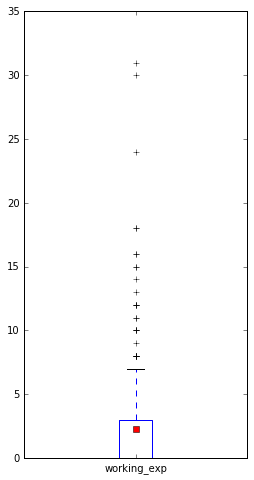

In [205]:
processed_working_exp.working_exp.plot.box(showmeans=True, figsize=(4,8))

In [206]:
stat_data['working_exp'] = processed_working_exp.working_exp.mean()
stat_data

{'working_exp': 2.288256227758007}

## Working time

In [207]:
from lifelines import KaplanMeierFitter

14.0


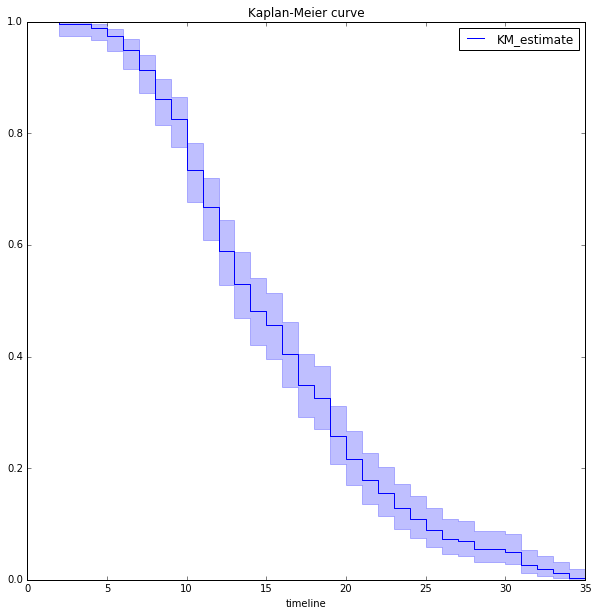

In [219]:
T, E = [], []
def t(working_time_data_each):
    global T, E
    total_time = 0
    censor = 0
    for index, row in working_time_data_each.iterrows():
        if row.c_employment_job_end == 'Current' or row.c_employment_job_end == None:
            row.c_employment_job_end = dt.datetime.now().date()
            censor = 1
        if row.c_employment_job_start == None:
            row.c_employment_job_start = dt.datetime.now().date()
        result = (row.c_employment_job_end - row.c_employment_job_start).days
        if result > 0:
            total_time = total_time + result
    
    if (total_time > 0 and total_time < 15000): # Error data, ignore who working for more than 40y
        T.append(total_time)
        E.append(censor)
    if total_time == 18695:
        print working_time_data_each
data.groupby('candidate_id').apply(t)

T_by_year = [t / 365 for t in T]
kmf = KaplanMeierFitter()
kmf.fit(T_by_year, event_observed=E)

kmf.plot(title="Kaplan-Meier curve", figsize=(10,10,))
print kmf.median_

In [216]:
stat_data['working_time_median'] = kmf.median_
stat_data

{'working_exp': 2.288256227758007,
 'working_time': 14.0,
 'working_time_median': 14.0}

## Number of job-hoppings

In [306]:
def first_time_working_for_activision(candidate_df):
    try:
        candidate_df = candidate_df[candidate_df.employer.str.contains('Activision')==True]
        min_time = candidate_df.iloc[0].c_employment_job_start
    except:
        min_time = dt.datetime.now().date()
    return min_time

In [317]:
jh_data = data
jh_data.c_employment_job_end = jh_data.c_employment_job_end.apply(
                lambda x: dt.datetime.now().date() if x == 'Current' else x)
jh_data = data.drop_duplicates()

jh_data2 = pd.DataFrame(columns=data.columns, dtype = data.dtypes)

for candidate_current_id in jh_data['candidate_id'].unique():
        candidate_current = jh_data[jh_data.candidate_id == candidate_current_id]
        min_time = first_time_working_for_activision(candidate_current)

        for i, row in candidate_current.iterrows():
            if not pd.isnull(min_time) and not pd.isnull(row.c_employment_job_end) and row.c_employment_job_end <= min_time:
                jh_data2.loc[len(jh_data2)] = row

In [312]:
jh_data2

,candidate_id,candidate_surname,candidate_name,c_employment_id,employer,job_title,job_title_desc,c_employment_job_start,c_employment_job_end
0,2315074.0,Black,Eric,23237978.0,4 Front Studios,Intern,NaN,2005-01-01,2006-01-01
1,2313410.0,Cave,Robert,23216064.0,Cigna,Information Security Senior Specialist,Responsible for all incident response and malw...,2012-05-01,2014-06-01
2,2313410.0,Cave,Robert,23216065.0,JPMorgan Chase & Co,Security Incident Analyst,Part of team responsible for managing/detectin...,2010-02-01,2012-04-01
3,2313410.0,Cave,Robert,23216066.0,"Women's Club Volleyball Team, Syracuse University",Head Coach,NaN,2009-09-01,2012-04-01
4,2313410.0,Cave,Robert,23216067.0,JPMorgan Chase & Co,Enterprise Access Admin,Responsible for administering identity and sec...,2009-06-01,2010-02-01
5,2313410.0,Cave,Robert,23216068.0,SysTech International,Technology Specialist,"Tested, developed and introduced automated inv...",2008-05-01,2008-08-01
6,2311327.0,Walsh,Steven,23189884.0,West Allis Community Media Center,Graphic Designer,- Designed community slides for station\n\n\n\...,2004-09-01,2005-12-01
7,2311253.0,Stoker,Steve,23188172.0,Activision,Quality Assurance Tester,"Worked in multiple labs, supporting diverse te...",2011-08-01,2012-10-01
8,2311253.0,Stoker,Steve,23188173.0,2K Games,Quality Assurance Tester,Wrote up a high volume of functionality bugs f...,2010-06-01,2011-06-01
9,2311253.0,Stoker,Steve,23188174.0,American Jewish University,Bookstore Clerk,Provided customer service for a wide variety o...,2010-01-01,2010-05-01


In [316]:
# Test
# jh_data2[jh_data2.candidate_id == 2313410]

In [318]:
jh_data = pd.DataFrame(jh_data2.groupby('candidate_id').count()['employer'])
jh_data.head(5)

,employer
candidate_id,
1930928.0,2
1932686.0,4
1933150.0,2
1934318.0,5
1936955.0,3


In [319]:
stat_data['job_hopings'] = jh_data['employer'].mean()
stat_data

{'job_hopings': 3.5508474576271185,
 'working_exp': 2.288256227758007,
 'working_time': 14.0,
 'working_time_median': 14.0}

## Seniority trend

In [24]:
def seniority(data):
    def calculate_seniority(employment_job_title):
        def checkSeniority (employment_job_title):
            lead = ["LEAD"]
            manager = ["TECHNICAL ARCHITECT", "ARCHITECT", "MANAGER"]
            senior_engineer = ["SENIOR", "SR.", "RESEARCH", "CONSULTANT"]
            senior_manager = ["SENIOR MANAGER", "DIRECTOR", "CHIEF", "PRINCIPAL", "CEO", "CIO"]


            for terms in senior_manager:
                if employment_job_title.upper().find(terms) != -1:
                    return 5
            for terms in manager:
                if employment_job_title.upper().find(terms) != -1:
                    return 4
            for terms in lead:
                if employment_job_title.upper().find(terms) != -1:
                    return 3
            for terms in senior_engineer:
                if employment_job_title.upper().find(terms) != -1:
                    return 2
            return -1

        seniority = checkSeniority(str(employment_job_title))
        if seniority != -1:
            return seniority
        else:
            return 1
        
    data_seniority = data
    data_seniority['seniority'] = data_seniority.job_title.map(calculate_seniority)
    
    return data_seniority[['candidate_id', 'seniority']]

In [25]:
seniority_data = seniority(data)

# get top 3 
top = 3
top_n_seniority = seniority_data.groupby('seniority').count().sort_values('candidate_id', ascending=False).head(top).index.tolist()
stat_data['seniority'] = top_n_seniority

In [26]:
stat_data

{'job_hopings': 6.252669039145908,
 'seniority': [1, 2, 4],
 'working_exp': 15.583629893238435,
 'working_time': 14.604982206405694}

## Top gender

In [320]:
def top_gender(data):
    return pd.DataFrame(data.groupby('candidate_gender').count()['candidate_id'])

In [321]:
gender_top = top_gender(general_info)
gender_top

,candidate_id
candidate_gender,
Female,40
Male,249
Unknown,1


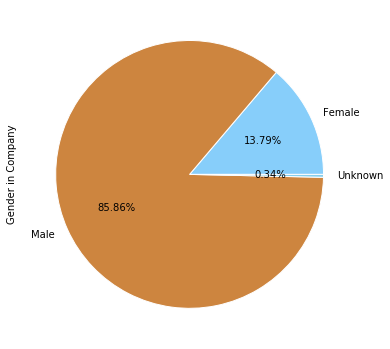

In [322]:
candidate_gender = pd.Series(gender_top.candidate_id, index=['Female', 'Male', 'Unknown'], name='Gender in Company')
plt.rcParams['patch.edgecolor'] = 'white' 
candidate_gender.plot.pie(figsize=(6, 6), colors=['lightskyblue', 'peru', 'skyblue'], autopct='%.2f%%')

In [323]:
stat_data['female_percent'] = float(gender_top.iloc[0] / sum(gender_top))

In [324]:
stat_data

{'female_percent': 0.13793103448275862,
 'job_hopings': 3.5508474576271185,
 'working_exp': 2.288256227758007,
 'working_time': 14.0,
 'working_time_median': 14.0}

## Skill

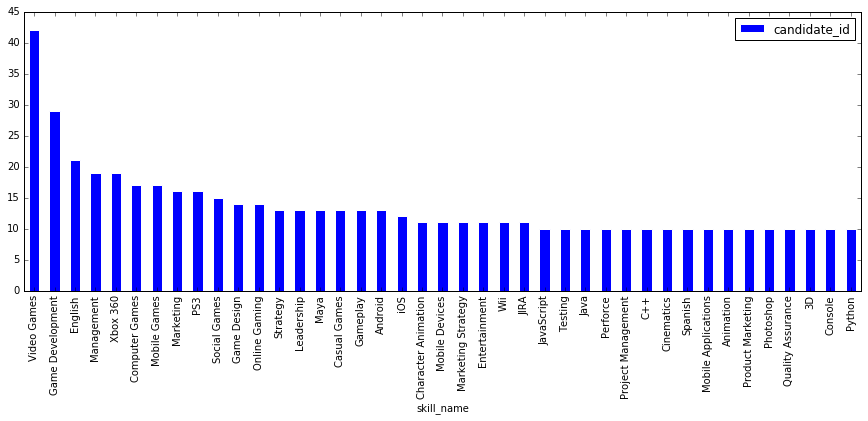

In [325]:
def skill_stat(data):
    data = data.drop_duplicates()
    
    frequency = data.groupby('skill_name').count().sort_values('candidate_id', ascending=False)
    return frequency
    
stat = skill_stat(skill_info)
plot_skills = stat[stat.candidate_id >= 10]
plot_skills.plot.bar(figsize=(15,5), color=['blue'])

In [326]:
stat_data['top_5_skill'] = stat.head(5).index.tolist()
stat_data

{'female_percent': 0.13793103448275862,
 'job_hopings': 3.5508474576271185,
 'top_5_skill': ['Video Games',
  'Game Development',
  'English',
  'Management',
  'Xbox 360'],
 'working_exp': 2.288256227758007,
 'working_time': 14.0,
 'working_time_median': 14.0}

## Top university

In [327]:
def fetch_top_university():
    # Load top university
    import requests
    url = 'http://www.topuniversities.com/sites/default/files/qs-rankings-data/326584.txt'
    r = requests.get(url)
    r = r.json()

    top_university = []
    if r:
        for row in r['data']:
            top_university.append(row['title'].lower())
    return top_university

In [328]:
def candidate_top_university(data):
    top_university = fetch_top_university()
    data['is_top'] = data.school_name.map(lambda x: 1 if str(x).decode('utf-8').lower() in top_university else 0)
    return pd.DataFrame(data.groupby('is_top').count()['candidate_id'])

candidate_edu = candidate_top_university(edu_info)
candidate_edu

,candidate_id
is_top,
0,600
1,150


In [329]:
stat_data['top_university_percent'] = float(candidate_edu.iloc[1] / sum(candidate_edu))
stat_data

{'female_percent': 0.13793103448275862,
 'job_hopings': 3.5508474576271185,
 'top_5_skill': ['Video Games',
  'Game Development',
  'English',
  'Management',
  'Xbox 360'],
 'top_university_percent': 0.2,
 'working_exp': 2.288256227758007,
 'working_time': 14.0,
 'working_time_median': 14.0}

## Ethnicity

In [330]:
general_info.head()

,candidate_id,candidate_surname,candidate_name,candidate_gender,candidate_degree,ethnicity,c_address_address1,c_address_address2,c_address_country,c_address_region,c_address_longitude,c_address_latitude
0,2315074,Black,Eric,Male,Masters,White/Caucasian,NaN,NaN,US,WA,-122.342528,47.606139
1,2313410,Cave,Robert,Male,Masters,White/Caucasian,NaN,NaN,US,NaN,-74.005941,40.712784
2,2311327,Walsh,Steven,Male,NaN,White/Caucasian,NaN,NaN,US,MA,NaN,NaN
3,2311253,Stoker,Steve,Male,Bachelors,White/Caucasian,Greater Los Angeles Area,NaN,US,CA,NaN,NaN
4,2308949,Mitchum Leeper,Kate,Female,Masters,White/Caucasian,San Francisco Bay Area,NaN,US,CA,-122.419415,37.774929


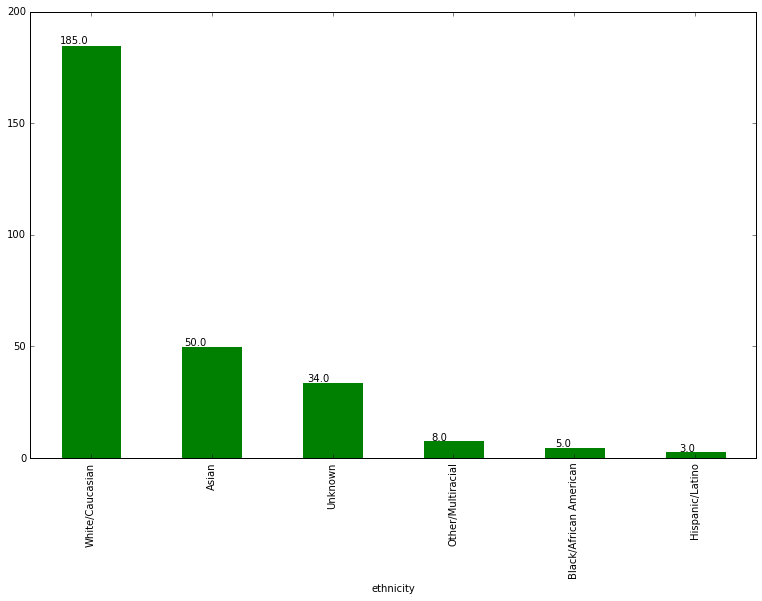

In [371]:
eth_df = general_info.groupby('ethnicity').count()['candidate_id'].sort_values(ascending=False)
ethnicity_plot = eth_df.plot.bar(figsize=(13,8), color=['green'])
for p in ethnicity_plot.patches:
    ethnicity_plot.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.005))

In [373]:
pd.DataFrame(eth_df)

,candidate_id
ethnicity,
White/Caucasian,185
Asian,50
Unknown,34
Other/Multiracial,8
Black/African American,5
Hispanic/Latino,3


## gender vs top_shool

In [421]:
def fetch_top_university():
    # Load top university
    import requests
    url = 'http://www.topuniversities.com/sites/default/files/qs-rankings-data/326584.txt'
    r = requests.get(url)
    r = r.json()

    top_university = []
    if r:
        for row in r['data']:
            top_university.append(row['title'].lower())
    return top_university

def candidate_top_university(data):
    top_university = fetch_top_university()
    data['is_top'] = data.school_name.map(lambda x: 1 if str(x).decode('utf-8').lower() in top_university else 0)
    return data

candidate_top_edu = candidate_top_university(edu_info)

In [445]:
gender_df = general_info[['candidate_id', 'candidate_gender']]
top_school_df = candidate_top_edu[['candidate_id', 'is_top']]

gender_top_school = pd.merge(gender_df, top_school_df, on='candidate_id')
gender_top_school.set_index('candidate_id')

gender_top_school = gender_top_school.drop_duplicates().dropna()
gender_top_school[:5]

,candidate_id,candidate_gender,is_top
0,2315074,Male,0
2,2313410,Male,1
3,2313410,Male,0
4,2311327,Male,0
7,2311253,Male,0


In [446]:
gender_top_school_tab = pd.crosstab(gender_top_school.candidate_gender, gender_top_school.is_top, margins=False)
gender_top_school_tab

is_top,0,1
candidate_gender,,
Female,28,10
Male,210,53
Unknown,1,0


In [450]:
# Not sure!!
stats.chisquare(gender_top_school_tab)

Power_divergenceResult(statistic=array([ 324.41004184,   75.52380952]), pvalue=array([  3.59132309e-71,   3.98302595e-17]))

## Before working for Activision

In [ ]:
def company_before_activision(data):
    data
    
    
company_before_activision(employment_info)